<div class="text_center", style="font-family: 'Helvetica', Helvetica, sans-serif;
                                 text-align: center;
                                 font-weight: normal;
                                 font-size: 20px;
                                 padding: 10px 50px 10px 0px">
    <span style="font-size: 15px;  font-weight: thin; font-weight: thin; ">
        Partial Differential Equations with Applications in Physics and Industry
    </span>
    <hr>
    <br>
    <br> 
    <span style="font-size: 30px;"> Wave Equation for the Seismic Wave Problem </span>
    <br>
    <br>
    Paulina Iwach-Kowalska 254362 &nbsp;
    <br> 
    Kamil Iwach-Kowalski 262300
    <br>
    <br>
    May 23, 2024
    <hr>
</div>

<div class="text", style="font-family: 'Helvetica', Helvetica, sans-serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 16px;
                          padding: 0px 100px 0px 0px;">
    <h2>Introduction</h2>
Wave equations are fundamental in describing many physical phenomena, such as acoustic, electromagnetic, and motion, across various media. Knowing the methods used to analyze wave problems makes it possible to model and predict wave behavior. This capability leads to increased safety, for example, through the prediction of extreme weather phenomena.
    
This project focuses on the seismic wave problem, described by a two-dimensional partial differential wave equation with Neumann's boundary conditions over a rectangular domain and with a constant wave speed propagation. 
    
The first part presents a description of the equation and an analytical solution scheme using the separation of variables method. Additionally, a detailed solution for three examples with specific initial condioton functions is presented.
    
Then, focus is on the numerical solution using the finite difference method. Both the mathematical idea of the method and the implementation in Python are presented. The results are demonstrated in the form of animations, which illustrate the wave behaviour for different initial conditions and various domains. In addition, results for the Neumann and Dirichlet boundary conditions were compared.
    
In the final section, consistency, convergence and stability of of the chosen numerical method were checked. This included examination of the mean absolute error between the analytical and numerical methods.

<div class="text", style="font-family: 'Helvetica', Helvetica, sans-serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 16px;
                          padding: 0px 100px 0px 0px;">
    <h2>Formulation of the seismic wave equation</h2>

---------------------------------------

<div class="text", style="font-family: 'Helvetica', Helvetica, sans-serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 16px;
                          padding: 0px 100px 0px 0px;">
 
$$\begin{cases}
u_{tt}       = c^2(u_{xx} + u_{yy}),  &(x, y) \in \Omega, \; t \in (0, T],  \tag{$1$} \\
u(x, y, 0)   = I(x, y),               &(x, y) \in \Omega, \\
u_t(x, y, 0) = V(x, y),               &(x, y) \in \Omega, \\
\frac{\partial u}{\partial n} = 0, & (x, y) \in \partial \Omega, \, t \in (0, T] .
\end{cases}$$

    
where 
* $c$ described speed of wave propagation, constant for a given medium.
* $\Omega$ is the domain. We consider a rectangular area, so in this case $\Omega \subset \left[K,L\right]\times\left[G,H\right]$.
* $\partial \Omega$ represents the boundary of the domain.
    
    
<span style="font-size: 16px; font-weight: bold;"> Initial conditions </span>
    
The functions $I(x,y)$ and $V(x,y)$ are the initial conditions of the equation. $I(x,y)$ describes the initial displacement and $V(x,y)$ the starting velocity of the wave. For seismic waves, this could represent the initial ground displacement and velocity caused by an earthquake.

    
<span style="font-size: 16px; font-weight: bold;"> Boundary condition </span>
is the Neuman condition, for which
$$\begin{align}
    \frac{\partial u}{\partial x} = 0, \ \frac{\partial u}{\partial y} = 0.
\end{align}
$$
This means that there is no flux of the wave across the boundary, which can be interpreted as reflection or isolation of the boundary. 


</div>

# Analytical solution
---------------------------------

To find the solution of wave equation (1), the separation of variables method is used. Therefore, it is assumed that the solution is of the form
$$
u(x, y, t) = X(x)Y(y)T(t). \tag{2}
$$
After substituting the solution (2) into equation (1), the following is obtained:
$$\begin{align*}
    X(x)Y(y)\frac{\mathrm{d}^2 T}{\mathrm{d} t^2}=c^2\left(\frac{\mathrm{d}^2 X}{\mathrm{d} x^2}Y(y)T(t)+X(x)\frac{\mathrm{d}^2 Y}{\mathrm{d} y^2}T\right).
\end{align*}$$   
After transformations, this results in 
$$\begin{align*}
    \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = \frac{1}{c^2T}\frac{\mathrm{d}^2T}{\mathrm{d}t^2}. \tag{3}
    \end{align*}$$
This must be equal to the some constant
$$\begin{align*}
    \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = \frac{1}{c^2T}\frac{\mathrm{d}^2T}{\mathrm{d}t^2} = -\lambda.
    \end{align*}$$
The equations are separated because both sides of equation (3) need to be equal to $- \lambda$ resulting in
$$\begin{equation*}
    \frac{1}{c^2T}\frac{\mathrm{d}^2T}{\mathrm{d}t^2} = -\lambda, \tag{4}
 \end{equation*}$$
and
$$\begin{align*}
    \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = - \lambda \\
    \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} = - \lambda - \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = -\mu.
    \tag{5}
 \end{align*}$$
For $T(t)$ the general solution of the equation (4) is 
$$\begin{equation*}
    T(t) = A\cos\left(c\sqrt{\lambda}t\right) + B\sin\left(c\sqrt{\lambda}t\right).
 \end{equation*}$$
 
Assuming that $K=0$ and $G=0$, the equation is solved on the rectangle $\left[0,L\right]\times\left[0,H\right]$.

From equation (5), it can be seen that the following equations need to be solved:
$$
\begin{cases}
\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \mu X(x) = 0 \\ 
\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} + \left(\lambda - \mu\right)Y(y) = 0.
\end{cases}
$$ <br>
<br>
<br>
From Neumann's boundary conditions for $X(x)$

$$\begin{equation*}
\frac{\partial u}{\partial x}= \frac{\partial}{\partial x}X(x)Y(y)T(t) = T(t)Y(y)\cdot\frac{\mathrm{d} X}{\mathrm{d} x} =0.
\end{equation*}$$

The case where $Y(y)\neq 0$ and $T(t)\neq 0$ is considered.
$$\begin{equation*}
\frac{\mathrm{d} X}{\mathrm{d} x} = -C\sqrt{\mu}\sin{\left(\sqrt{\mu}x\right)} + D\sqrt{\mu}\cos{\left(\sqrt{\mu}x\right)} = 0.
\end{equation*}$$

For $x=0$
$$\begin{equation*}
D\sqrt{\mu}=0 \implies D=0.
\end{equation*}$$
For $x=L$
$$\begin{equation*}
\frac{\mathrm{d} X}{\mathrm{d} x} = -C\sqrt{\mu}\sin{\left(\sqrt{\mu}L \right)} = 0 \implies \sin{\left(\sqrt{\mu}L \right)}=0 \implies \mu = \left( \frac{n\pi}{L} \right)^{2}, \ n=0,1,2,3,\dots \tag{6}
\end{equation*}$$
Thus, it can be seen that $X(x)=C\cos{\left(\frac{n\pi}{L}x\right)}$, where $n=0,1,2,3,\dots$.<br>
<br>
<br>

From Neumann's boundary conditions for $Y(y)$
$$\begin{equation*}
\frac{\partial u}{\partial y}= \frac{\partial}{\partial y}X(x)Y(y)T(t) = T(t)X(x)\cdot\frac{\mathrm{d} Y}{\mathrm{d} y} =0.
\end{equation*}$$
The case where $X(x)\neq 0$ and $T(t)\neq 0$ is considered.
The value calculated in (6) is substituted for $\mu$.
$$\begin{equation*}
\frac{dY}{dy} = -E \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \sin \left( \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \, y \right) + F \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \cos \left( \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \, y \right).
\end{equation*}$$
For $y=0$
$$\begin{equation*}
\frac{dY}{dy} = F \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \cos \left( 0 \right)=0 \implies F=0.
\end{equation*}$$
For $y=H$
$$\begin{align*}
\frac{dY}{dy} = -E \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \sin \left( \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \, H \right)&=0 \\
\sin \left( \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \, H \right)&=0 \\
\left( \sqrt{\lambda - \left( \frac{n\pi}{L} \right)^2} \, H \right) &= m\pi, \ m=0,1,2,3,\dots \\
\lambda &= \left(\frac{m\pi}{H} \right)^2 + \left(\frac{n\pi}{L} \right)^2.
\end{align*}$$
Thus, it can be seen that $Y(y)=E\cos{\left(\frac{m\pi}{H}y\right)}$, where $m=0,1,2,3,\dots$. <br>
<br>
It is important to note that there is a solution for $m$ and $n$ equal to 0, however  in that case $\lambda$ and $\mu$ are also equal to 0 and are not eigenvalues for this boundary value problem.

So finall solution is as follows

$$\begin{equation*}
u(x,y,t)= \left(A\cos\left(c\sqrt{\lambda}t\right) + B\sin\left(c\sqrt{\lambda}t\right)\right)C\cos{\left(\frac{n\pi}{L}x\right)}E\cos{\left(\frac{m\pi}{H}y\right)}.
\end{equation*}$$

which may be written in the form of
$$\begin{equation*}
u_{nm}(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ A_{nm} \cos \left( c \sqrt{\lambda_{nm}} \, t \right) + B_{nm} \sin \left( c \sqrt{\lambda_{nm}} \, t \right) \right] \cos \left( \frac{n \pi x}{L} \right) \cos \left( \frac{m \pi y}{H} \right),
\end{equation*}$$
where $A_{nm}=A\cdot C \cdot E$ and $B_{nm}=B\cdot C\cdot E$.<br>

The circular frequency in this case is $\omega_{nm}=c\sqrt{\left(\frac{m\pi}{H} \right)^2 + \left(\frac{n\pi}{L} \right)^2}$. 
It can also be seen that functions 
$$\begin{equation*}
\cos \left( \frac{n \pi x}{L} \right), \ \cos \left( \frac{m \pi y}{H} \right)
\end{equation*}$$
are spatial eigenfunctions of the wave equation, also known as vibration modes. They describes the spatial behavour of the wave.  The function $\cos \left( \frac{n \pi x}{L} \right)$ represents the  distribution of the wave in the $x$-direction for mode $n$, while $\cos \left( \frac{m \pi y}{H} \right)$ shows behavour in the $y$-direction for mode $m$. In general, each combination  of $n$ and $m$ values represents unique mode of vibration and thus a different solution of equation.<br>

In order to obtain the final solution of the equation, the values of $A_{nm}$ and $B_{nm}$ have to be counted. However, for this case this would require separate consideration of several combinations of $n$ and $m$.
The complete solution for initial conditions in the form of general undefined functions (in this case $I(x,y)$ and $V(x,y)$) is relatively difficult and nontrivial. Thus, to illustrate the overall step-by-step solution, three examples are presented later, with specific cases of the initial conditions function.

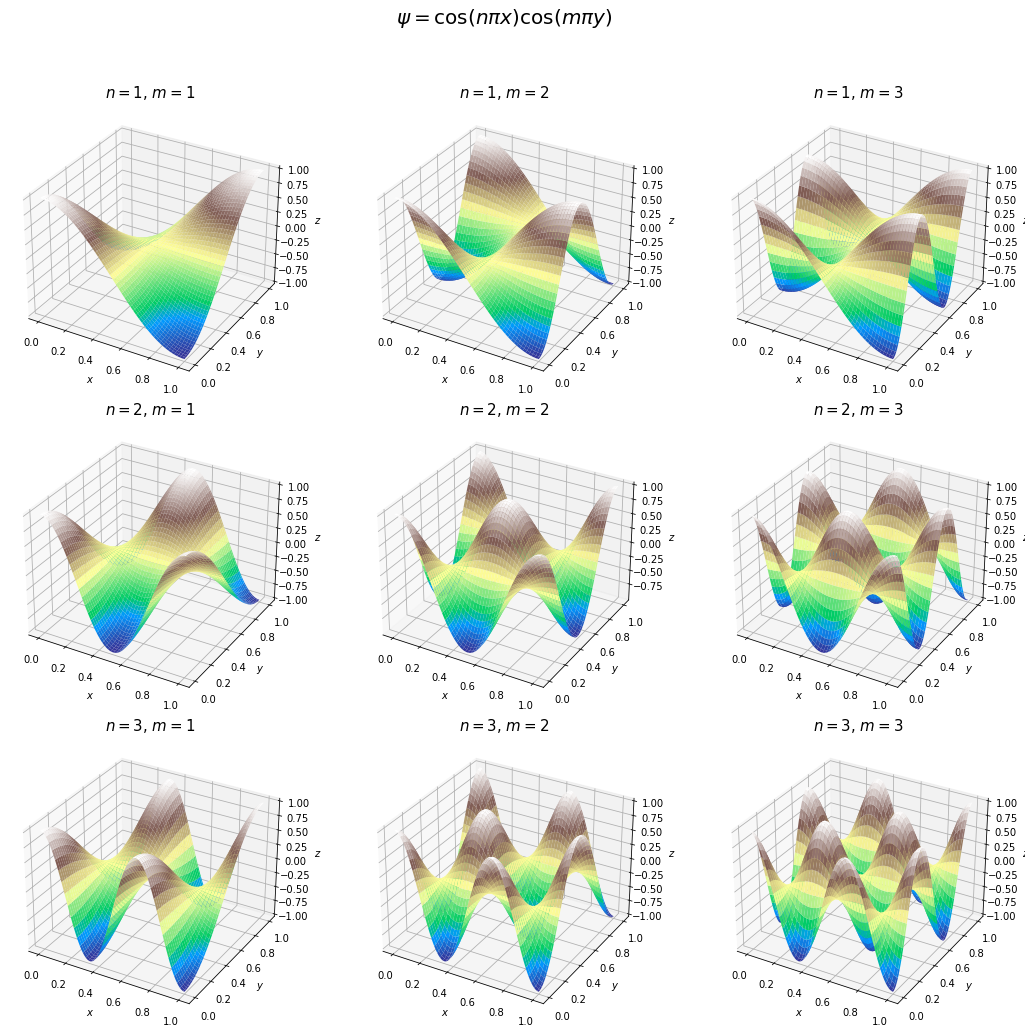

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Define the function
def f(x, y, n, m):
    return np.cos(n * np.pi * x) * np.cos(m * np.pi * y)

# Define the grid
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Create a figure with 9 subplots
fig = plt.figure(figsize=(15, 15))

# Loop over n and m to create each subplot
plot_number = 1
for n in range(1, 4):
    for m in range(1, 4):
        Z = f(X, Y, n, m)
        ax = fig.add_subplot(3, 3, plot_number, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='terrain')
        ax.set_title(f'$n={n}$, $m={m}$', fontsize=15)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')
        plot_number += 1
fig.suptitle('$\\psi =$cos$(n\\pi x)$cos$({m}\\pi y)$', fontsize=20)
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Application of the Finite Difference Method to Solve the Seismic Wave Equation
--------------------------
## Discretization

To solve this PDE using the finite difference method, we discretize the spatial and temporal domains. We create a rectangular mesh over the domain $\Omega = [A, B] \times [C, D]$ with spatial step sizes $\Delta x$ and $\Delta y$, and a temporal step size $\Delta t$.

### Rectangular Mesh

Let $ N_x $ and $ N_y $ be the number of grid points in the $ x $ and $ y $ directions, respectively. The spatial grid points are defined as:

$$ x_i = A + i \Delta x \Leftrightarrow \Delta x = x_i-x_{i-1}, \quad i = 0, 1, \ldots, Nx, $$
$$ y_j = C + j \Delta y \Leftrightarrow \Delta y = y_i-y_{i-1}, \quad j = 0,1, \ldots, N_y. $$

Similarly, let $ N_t $ be the number of time steps. The temporal grid points are defined as:

$$ t_n = n \Delta t \Leftrightarrow \Delta t = t_i-t_{i-1}, \quad n = 0,1, \ldots, N_t $$

We denote numerical approximation of $ u(x_i,y_j,t_n) $ as $ u^n_{i,j} $.  

### Finite Difference Approximation

#### Forward Difference

On a computer, derivatives are approximated by finite difference expressions; rearranging gives the forward difference approximation:

$$ \frac{f(x + \Delta x) - f(x)}{\Delta x} = f'(x) + O(\Delta x), $$

where $ O(\Delta x) $ means 'terms of order $\Delta x$', i.e., terms which have size similar to or smaller than $\Delta x$ when $\Delta x$ is small. So the expression on the left approximates the derivative of $ f $ at $ x $, and has an error of size $\Delta x$; the approximation is said to be 'first order accurate'.

#### Backward Difference

Rearranging similarly gives the backward difference approximation:

$$ \frac{f(x) - f(x - \Delta x)}{\Delta x} = f'(x) + O(\Delta x), $$

which is also first order accurate, since the error is of order $\Delta x$.

#### Centered Difference

Combining the forward and backward difference approximations gives the centered difference approximation:

$$ \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x} = f'(x) + O(\Delta x^2), $$

which is 'second order accurate', because the error this time is of order $\Delta x^2$.

#### Second Derivative Centered Difference

Adding the forward and backward difference expressions and using Taylor's formula gives:

$$ f(x + \Delta x) + f(x - \Delta x) = 2f(x) + \Delta x^2 f''(x) + \frac{\Delta x^4}{12} f^{(4)}(x) + \cdots $$

Rearranging this therefore gives the centered difference approximation to the second derivative:

$$ \frac{f(x + \Delta x) - 2f(x) + f(x - \Delta x)}{\Delta x^2} = f''(x) + O(\Delta x^2), $$

which is second order accurate.

Using these finite difference approximations, we can discretize the seismic wave equation.

### Discretized Wave Equation

The second-order central difference approximations for the second derivatives are:

$$ u_{xx} \approx \frac{u^n_{i+1,j} - 2u^n_{i,j} + u^n_{i-1,j}}{(\Delta x)^2}, $$ 
$$ u_{yy} \approx \frac{u^n_{i,j+1} - 2u^n_{i,j} + u^n_{i,j-1}}{(\Delta y)^2}, $$

$$ u_{tt} \approx \frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2}. $$

Substituting these approximations into the wave equation, we get the finite difference scheme:

$$\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} = c^2\frac{u_{i+1,j}^{n} - 2u_{i,j}^n + u_{i-1,j}^{n}}{(\Delta x)^2} + c^2\frac{u_{i,j+1}^{n} - 2u_{i,j}^n + u_{i,j-1}^{n}}{(\Delta y)^2} $$

$$ u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + \left( \frac{c \Delta t}{\Delta x} \right)^2 (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \left( \frac{c \Delta t}{\Delta y} \right)^2 (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n). \tag{**} $$


### Initial Conditions

The initial conditions are specified as:

$$ I(x_i, y_j)=u(x_i, y_j, 0) = u^0_{i,j},  $$
$$ V(x_i, y_j) = u_t(x_i, y_j, 0) = \frac{u_{i, j}^1 - u_{i, j}^{-1}}{2\Delta t} \; \Longrightarrow \; u_{i,j}^{-1} = u_{i,j}^1 - 2\Delta t V(x_i, y_j). $$

To get rid of 'fictional' value $ u_{i,j}^{-1} $ we use equation $ (**) $ with $ n=0 $ and obtain

$$ u_{i,j}^{1} = 2u_{i,j}^0 - u_{i,j}^1 + 2\Delta t V(x_i, y_j) + \left( \frac{c \Delta t}{\Delta x} \right)^2 (u_{i+1,j}^0 - 2u_{i,j}^0 + u_{i-1,j}^0) + \left( \frac{c \Delta t}{\Delta y} \right)^2 (u_{i,j+1}^0 - 2u_{i,j}^0 + u_{i,j-1}^0), $$

$$u_{i,j}^{1} = u_{i, j}^0  + \Delta t V(x_i, y_j) + \frac{1}{2}\left( \frac{c \Delta t}{\Delta x} \right)^2\left(u_{i+1, j}^0 -2u_{i, j}^0 + u_{i-1, j}^0\right) + \frac{1}{2}\left( \frac{c \Delta t}{\Delta y} \right)^2\left(u_{i, j+1}^0 -2u_{i, j}^0 + u_{i, j-1}^0\right).$$

In summary we have
$$
\begin{cases}
u^0_{i,j} = I(x_i, y_j), \\
u_{i,j}^{1} = u_{i, j}^0  + \Delta t V(x_i, y_j) + \frac{1}{2}\left( \frac{c \Delta t}{\Delta x} \right)^2\left(u_{i+1, j}^0 -2u_{i, j}^0 + u_{i-1, j}^0\right) + \frac{1}{2}\left( \frac{c \Delta t}{\Delta y} \right)^2\left(u_{i, j+1}^0 -2u_{i, j}^0 + u_{i, j-1}^0\right), \\
u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + \left( \frac{c \Delta t}{\Delta x} \right)^2 (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \left( \frac{c \Delta t}{\Delta y} \right)^2 (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n). 
\end{cases}
$$

To avoid potential 'fictional' values $ u_{i+1, j}^0$, $u_{i-1, j}^0$, $u_{i, j+1}^0$, $u_{i, j-1}^0 $ when calculating $u^1_{i,j}$ and after $u_{i,j}^{n+1}$, we will apply boundary conditions.

### Boundary Conditions

We apply homogeneous Neumann boundary conditions, which specify that the normal derivative of $ u $ on the boundary is zero

$$ \frac{\partial u}{\partial n} = 0 \quad\text{for } (x, y) \in \partial \Omega, \, t \in (0, T], $$

$$
\begin{cases}
u_x(A,y,t)=\frac{u_{1, j}^n - u_{-1, j}^{n}}{2\Delta x}=0 \\
u_x(B,y,t)=\frac{u_{N_x+1, j}^n - u_{N_x-1, j}^{n}}{2\Delta x}=0 \\
u_y(x,C,t)=\frac{u_{i, 1}^n - u_{i, -1}^{n}}{2\Delta y}=0 \\
u_y(x,D,t)=\frac{u_{i, N_y+1}^n - u_{i, N_y-1}^{n}}{2\Delta y}=0 
\end{cases} \qquad \Longrightarrow \qquad

\begin{cases}
u_{1, j}^n = u_{-1, j}^{n}\\
u_{N_x+1, j}^n = u_{N_x-1, j}^{n}\\
u_{i, 1}^n = u_{i, -1}^{n}\\
u_{i, N_y+1}^n = u_{i, N_y-1}^{n}
\end{cases}.
$$

Again, to eleminate the 'fictional' values $  u_{-1, j}^{n}$, $u_{N_x+1, j}^n$, $u_{i, -1}^{n}$, $u_{i, N_y+1}^n $ we use $ (**) $. For example for $ i=0 $ we get 

$$ u_{0,j}^{n+1} = 2u_{0,j}^n - u_{0,j}^{n-1} + \left( \frac{c \Delta t}{\Delta x} \right)^2 (u_{1,j}^n - 2u_{0,j}^n + u_{-1,j}^n) + \left( \frac{c \Delta t}{\Delta y} \right)^2 (u_{0,j+1}^n - 2u_{0,j}^n + u_{0,j-1}^n), $$

$$ u_{0,j}^{n+1} = 2u_{0,j}^n - u_{0,j}^{n-1} + \left( \frac{c \Delta t}{\Delta x} \right)^2 (2u_{1,j}^n - 2u_{0,j}^n) + \left( \frac{c \Delta t}{\Delta y} \right)^2 (u_{0,j+1}^n - 2u_{0,j}^n + u_{0,j-1}^n), $$






# Application in python
---------------------------------

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import os

plt.ioff()
import warnings
warnings.filterwarnings('ignore')

def initialize_grid(A, B, C, D, x_delta, y_delta):
    x = np.arange(A, B+x_delta, x_delta)
    y = np.arange(C, D+y_delta, y_delta)
    Nx = len(x)
    Ny = len(y)
    return x, y, Nx, Ny

def initial_conditions(I, V, x, y, Nx, Ny):
    u = np.zeros((Nx, Ny))
    ut = np.zeros((Nx, Ny))
    for i in range(Nx):
        for j in range(Ny):
            u[i, j] = I(x[i], y[j])
            ut[i, j] = V(x[i], y[j])
    return u, ut


def update_solution(u, u_prev, r, s, Nx, Ny):
    u_new = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            #Boundary conditions
            ip1 = i + 1 if i < Nx - 1 else i - 1
            im1 = i - 1 if i > 0 else i + 1
            jp1 = j + 1 if j < Ny - 1 else j - 1
            jm1 = j - 1 if j > 0 else j + 1
            
            u_new[i, j] = (2 * u[i, j] - u_prev[i, j] +
                           r * (u[ip1, j] - 2 * u[i, j] + u[im1, j]) +
                           s * (u[i, jp1] - 2 * u[i, j] + u[i, jm1]))
     
      
    return u_new

def simulate_wave(A, B, C, D, dt, dx, dy, N, c, I, V):
    x, y, Nx, Ny = initialize_grid(A, B, C, D, dx, dy)
    T = N * dt
    t = np.arange(0, T+dt, dt)
    r = (c * dt / dx) ** 2
    s = (c * dt / dy) ** 2
    
    u, ut = initial_conditions(I, V, x, y, Nx, Ny)
    u_prev = u.copy()
    
    solution = np.zeros((Nx, Ny, N+1))
    solution[:, :, 0] = u
    
      
    for i in range(0,Nx):
        for j in range(0,Ny):
            #Boundary conditions
            ip1 = i + 1 if i < Nx - 1 else i - 1
            im1 = i - 1 if i > 0 else i + 1
            jp1 = j + 1 if j < Ny - 1 else j - 1
            jm1 = j - 1 if j > 0 else j + 1
            
            #Initial conditions
            solution[i, j, 1] = (u[i, j] + dt * ut[i, j] +
                                r/2 * (u[ip1, j] - 2 * u[i, j] + u[im1, j]) +
                                s/2 * (u[i, jp1] - 2 * u[i, j] + u[i, jm1]))  
    
    for n in range(1, N):
        u_new = update_solution(solution[:, :, n], solution[:, :, n-1], r, s, Nx, Ny)
        solution[:, :, n+1] = u_new
        
    return solution, x, y, t


#-----------------------------------------Dirichlet BC-----------------------------------------------
def update_solution_dirichlet(u, u_prev, r, s, Nx, Ny):
    u_new = np.zeros((Nx, Ny))
    
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            u_new[i, j] = (2 * u[i, j] - u_prev[i, j] +
                           r * (u[i+1, j] - 2 * u[i, j] + u[i-1, j]) +
                           s * (u[i, j+1] - 2 * u[i, j] + u[i, j-1]))      
    return u_new

def simulate_wave_dirichlet(A, B, C, D, dt, dx, dy, N, c, I, V):
    x, y, Nx, Ny = initialize_grid(A, B, C, D, dx, dy)
    T = N * dt
    t = np.arange(0, T+dt, dt)
    r = (c * dt / dx) ** 2
    s = (c * dt / dy) ** 2
    
    u, ut = initial_conditions(I, V, x, y, Nx, Ny)
    
    solution = np.zeros((Nx, Ny, N+1))
    solution[:, :, 0] = u
    
      
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):            
            solution[i, j, 1] = (u[i, j] + dt * ut[i, j] +
                                r/2 * (u[i+1, j] - 2 * u[i, j] + u[i-1, j]) +
                                s/2 * (u[i, j+1] - 2 * u[i, j] + u[i, j-1]))  
    
  

    #Dirichlet boundary conditions
    solution[0, :, 0] = 0
    solution[:, 0, 0] = 0
    solution[-1, :, 0] = 0
    solution[:, -1, 0] = 0
    
    solution[0, :, 1] = 0
    solution[:, 0, 1] = 0
    solution[-1, :, 1] = 0
    solution[:, -1, 1] = 0
    
    for n in range(1, N):
        u_new = update_solution_dirichlet(solution[:, :, n], solution[:, :, n-1], r, s, Nx, Ny)        
        u_new[0, :] = 0
        u_new[:, 0] = 0
        u_new[-1, :] = 0
        u_new[:, -1] = 0
        solution[:, :, n+1] = u_new
        
    return solution, x, y, t
#------------------------------------------------------------------------------------------------------
    
def plot_combined_solution(solution, x, y, N, t_delta, anim_name, c, I, V, dpi=100, cmap='terrain', stable=True):
    fig = plt.figure(figsize=(10, 5),dpi=dpi)
    # 3D plot on the left
    ax1 = fig.add_subplot(121, projection='3d')
    X, Y = np.meshgrid(x, y)
    Z = solution[:, :, 0]
    if stable:
        vmin, vmax = solution.min(), solution.max()
    else:
        vmin, vmax = -1, 1
        
    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax1.set_zlim(vmin, vmax)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$u$')
    surf = ax1.plot_surface(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)

    # Heatmap on the right
    ax2 = fig.add_subplot(122)
    cax = ax2.imshow(solution[:, :, 0], extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
    fig.colorbar(cax, ax=ax2)
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')

    title = fig.suptitle(f'{I}, {V}\n$c={c}$, $t=0$')

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    def update(frame):
        ax1.clear()
        ax1.plot_surface(X, Y, solution[:, :, frame], cmap=cmap, vmin=vmin, vmax=vmax)
        ax1.set_xlim(x.min(), x.max())
        ax1.set_ylim(y.min(), y.max())
        ax1.set_zlim(vmin, vmax)
        ax1.set_xlabel('$x$')
        ax1.set_ylabel('$y$')
        ax1.set_zlabel('$u$')
        ax1.view_init(elev=30, azim=frame * 360 / N)

        cax.set_data(solution[:, :, frame])
        title.set_text(f'{I}, {V}\n$c={c}$, $t={np.round(frame * t_delta, 2)}$')
        return surf, cax

    ani = FuncAnimation(fig, update, frames=range(0, N), blit=True)
    ani.save(anim_name, fps=15, dpi=dpi)
    plt.close()
    


In [17]:
def plot_results_comparision(solution, x, y,t_delta, N, u):
    X, Y = np.meshgrid(x, y, indexing='ij')

    P1 = solution[:,:,N]
    P2 = u(X, Y,  N*t_delta)
    plt.figure(figsize=(15,9))
    plt.subplot(1, 3, 1)
    plt.gca().set_title(f'Numerical solution for $t={np.round(N*t_delta,2)}$')
    plt.imshow(P1, extent=[A, B, C, D], origin='lower', cmap='terrain')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(1, 3, 2)
    plt.gca().set_title(f'Analytical solution for $t={np.round(N*t_delta,2)}$')
    plt.imshow(P2, extent=(A, B, C, D), origin='lower', cmap='terrain')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(1, 3, 3)
    plt.gca().set_title('Absolute value of difference between solutions')
    plt.imshow(np.abs(P1-P2), extent=(A, B, C, D), origin='lower', cmap='terrain')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
    
    
    err = [np.mean(np.abs(u(X, Y, step*t_delta)-solution[:,:,step])) for step in range(N+1)]

    plt.plot([step*t_delta for step in range(N+1)], err)
    plt.xlabel('time')
    plt.ylabel('MAE')
    plt.title('Mean absolute error of analytical and numerical solutions')
    plt.grid()
    plt.show()
    

def calculate_errors(A, B, C, D, N, c, I, V, u, filename, r = 0.8):
    r = 0.8
    x_delta_space = [2**pow for pow in range(-6,1)]

    err_global = []
    err_point = []
    for x_d in x_delta_space:
        x_delta = x_d
        y_delta = x_d
        t_delta = r*x_delta/(c*np.sqrt(2))
        solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

        X, Y = np.meshgrid(x, y, indexing='ij')
        analytical = np.zeros_like(solution)
        for tim in range(N+1):
            analytical[:,:,tim] = u(X, Y,  tim*t_delta)
        
        err_global.append(np.mean(np.mean(np.abs(solution-analytical), axis=(0,1))))
        
        mid_point = int(solution.shape[0]/2) 
        err_point.append(np.mean(np.abs(solution[mid_point, mid_point, :]-analytical[mid_point, mid_point, :])))
        
    errors = np.column_stack((x_delta_space, err_global, err_point))
    np.savetxt(filename, errors, delimiter=';', header='x_delta,err_global,err_point', comments='')
    return x_delta_space, err_global, err_point

def return_coef(x, y):
    from sklearn.linear_model import LinearRegression
    x = np.array(x)
    y = np.array(y)
    x = x.reshape(-1, 1)
    model = LinearRegression().fit(np.log(x), np.log(y))
    return np.round(model.coef_[0], 3)


def plot_log_log(x_delta_space, err_global, err_point):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.gca().set_title(f'Global mean absolute error\nbetween solutions after $601$ iterations depending on $\Delta x$.\nSlope value of fitted LR line: {return_coef(x_delta_space, err_global)}')
    plt.loglog(x_delta_space, err_global)
    plt.xlabel('log$(\Delta x)$')
    plt.ylabel('log(Error)')
    plt.grid()
    
    
    plt.subplot(1, 2, 2)
    plt.gca().set_title(f'Middle point mean asolute error\nbetween solutions after $601$ iterations depending on $\Delta x$.\nSlope value of fitted LR line: {return_coef(x_delta_space, err_point)}')
    plt.loglog(x_delta_space, err_point)
    plt.xlabel('log$(\Delta x)$')
    plt.ylabel('log(Error)')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Example 1.1: Fault Line Slip

A fault line slip can be simulated by initializing a sudden displacement along a specific line within the domain. This can represent the initial rupture during an earthquake.

### Domain:
- $(x, y) \in \left[-10,10 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = 0 $
- $ V(x, y) = \exp(-10 \cdot y^2) \cdot \sin(\pi x) $

This initial condition simulates a slip along the y-axis at x = 0, representing a fault line.


In [78]:
A, B, C, D = -10, 10, -10, 10
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5

I = lambda x, y: np.zeros_like(x)
V = lambda x, y: np.exp(-10 * y**2) * np.sin(np.pi * x)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

plot_combined_solution(solution, x, y, N, t_delta, f'gifs/ex1.gif', c, '$I(x,y)=0$', '$V(x,y)=\exp(-10 \cdot y^2) \cdot \sin(\pi x)$')

MovieWriter ffmpeg unavailable; using Pillow instead.


![EX1](gifs/ex1.gif)

## Example 1.2: Seismic Wave Propagation

Seismic waves spreading from a point source can be modeled to represent the propagation of waves from an epicenter of an earthquake.

### Domain:
- $(x, y) \in \left[-5,5 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = \exp(-10 \cdot (x^2 + y^2)) $
- $ V(x, y) = 0 $

This represents an initial displacement at the center, which could be the epicenter of an earthquake.



In [83]:
A, B, C, D = -5, 5, -5, 5
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5
I = lambda x, y: np.exp(-10 * (x**2 + y**2))
V = lambda x, y: np.zeros_like(x)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

plot_combined_solution(solution, x, y, N, t_delta, f'gifs/ex2.gif', c, '$I(x,y)=\exp(-10 \cdot (x^2 + y^2))$', '$V(x,y)=0$')

MovieWriter ffmpeg unavailable; using Pillow instead.


![EX2](gifs/ex2.gif)

## Example 1.3: Shear Wave

Shear waves (S-waves) can be represented by sinusoidal initial conditions that simulate horizontal shear motion.

### Domain:
- $(x, y) \in \left[-10,10 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = 0 $
- $ V(x, y) = \sin(\pi x / 5) \cdot \cos(\pi y / 5) $

This models the initial shear wave disturbance.

In [80]:
A, B, C, D = -10, 10, -10, 10
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5
I = lambda x, y: np.zeros_like(x)
V = lambda x, y: np.sin(np.pi * x / 5) * np.cos(np.pi * y / 5)
solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

plot_combined_solution(solution, x, y, N, t_delta, f'gifs/ex3.gif', c, '$I(x,y)=0$', '$V(x,y)=\sin(\pi x / 5) \cdot \cos(\pi y / 5)$')

MovieWriter ffmpeg unavailable; using Pillow instead.


![EX3](gifs/ex3.gif)

## Example 1.4: Layered Earthquake Model

The Earth's crust consists of different layers with varying properties. This can be simulated by varying the initial conditions to reflect different layers' behavior.

### Domain:
- $(x, y) \in \left[-10,10 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = \exp(-10 \cdot ((x-2)^2 + y^2)) \cdot H(x) $
- $ V(x, y) = \exp(-10 \cdot ((x+2)^2 + y^2)) \cdot H(-x) $

Here, $ H(x) $ is the Heaviside step function, simulating different behaviors on either side of the y-axis.

In [81]:
A, B, C, D = -10, 10, -10, 10
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5
I = lambda x, y: np.exp(-10 * ((x-2)**2 + y**2)) * (x >= 0)
V = lambda x, y: np.exp(-10 * ((x+2)**2 + y**2)) * (x < 0)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

plot_combined_solution(solution, x, y, N, t_delta, f'gifs/ex4.gif', c, '$I(x,y)=\exp(-10 \cdot ((x-2)^2 + y^2)) \cdot H(x)$', '$V(x,y)=\exp(-10 \cdot ((x+2)^2 + y^2)) \cdot H(-x)$')

MovieWriter ffmpeg unavailable; using Pillow instead.


![EX4](gifs/ex4.gif)

## Example 1.5: Deep Earthquake Source

Deep-focus earthquakes occur at significant depths within the Earth. The initial disturbance can be modeled deeper in the domain.

### Domain:
- $x \in \left[-10,10 \right]$,
- $y \in \left[-20,0 \right], \; t>0$

### Initial Conditions:
- $ I(x, y) = \exp(-10 \cdot (x^2 + (y+10)^2)) $
- $ V(x, y) = 0 $

This models a deep source of disturbance.

In [82]:
A, B, C, D = -10, 10, -20, 0

I = lambda x, y: np.exp(-10 * (x**2 + (y+10)**2))
V = lambda x, y: np.zeros_like(x)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)

plot_combined_solution(solution, x, y, N, t_delta, f'gifs/ex5.gif', c, '$I(x,y)=\exp(-10 \cdot (x^2 + (y+10)^2))$', '$V(x,y)=0$')

MovieWriter ffmpeg unavailable; using Pillow instead.


![EX5](gifs/ex5.gif)

# Comparison of Neumann and Dirichlet boundary conditions
-------------------------------------------------------

In our work we have focused on Neumann boundary conditions, but another option would be to consider Dirichlet conditions. Dirichlet boundary conditions are conditions where the solution is fixed to a certain value on the boundary of the domain, so for example $ u(x,y,t) = 0$ for $(x, y) \in \partial \Omega$. We decided to implement them additionally and present the visual differences between these conditions


## Example 2.1

### Domain:
- $(x, y) \in \left[-5,5 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = \exp(- (x^2 + y^2)) $
- $ V(x, y) = 0 $


In [168]:
A, B, C, D = -5.0, 5.0, -5.0, 5.0 
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5

I = lambda x, y: np.exp(-(x**2 + y**2))
V = lambda x, y: np.zeros_like(x)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/comparision_neumann.gif', c, '$I(x,y)=\e^{-(x^2+y^2)}$', '$V(x,y)=0$')

solution, x, y, t = simulate_wave_dirichlet(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/comparision_dirichlet.gif', c, '$I(x,y)=e^{-(x^2+y^2)}$', '$V(x,y)=0$')

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


Neumann boundary conditions             |  Dirichlet boundary conditions 
:-------------------------:|:-------------------------:
![Neumann](gifs/comparision_neumann.gif)  |  ![Dirichlet](gifs/comparision_dirichlet.gif)


## Example 2.2

### Domain:
- $(x, y) \in \left[-5,5 \right],\ t>0$

### Initial Conditions:
- $ I(x, y) = \exp(- ((x-2)^2 + 2(y+1)^2)) $
- $ V(x, y) = \exp(- ((x+1)^2 + (y-2)^2)) $

In [188]:
A, B, C, D = -5, 5, -5, 5 
t_delta = 0.1
x_delta = 0.1
y_delta = 0.1
N = 600
c = .5

I = lambda x, y: np.exp(-((x-2)**2 + 2*(y+1)**2))
V = lambda x, y: np.exp(-((x+1)**2 + (y-2)**2))

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/comparision_neumann2.gif', c, '$I(x,y)=e^{(-((x-2)^2 + 2*(y+1)^2))}$', '$V(x,y)=e^{(-((x+1)^2 + (y-2)^2))}$')

solution, x, y, t = simulate_wave_dirichlet(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/comparision_dirichlet2.gif', c, '$I(x,y)=e^{(-((x-2)^2 + 2*(y+1)^2))}$', '$V(x,y)=e^{(-((x+1)^2 + (y-2)^2))}$')

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


Neumann boundary conditions |  Dirichlet boundary conditions 
:-------------------------:|:-------------------------:
![Neumann2](gifs/comparision_neumann2.gif)  |  ![Dirichlet2](gifs/comparision_dirichlet2.gif)


# Consistency
--------------------------------------

<span style="font-size: 16px; font-weight: bold;">Definition [1] </span>
A local truncation error (LTE) is the remainder of the numerical scheme when $y_n$ is replaced with the exact solution of the corresponding ODE, that is $y(x_n)$. If LTE vanishes as $h \to 0^{+}$ the method is said to be consistent.

For the PDE problem considered in the project, the exact solution is of the form $u(x_i,y_j,t_n)$ and replaces the numerical solution $u_{i,j}^{n}$. The method is consistent if LTE vanishes as $\Delta t \to 0^+$, $\Delta x \to 0^+$, $\Delta y \to 0^+$.


First, recall the finite difference scheme for the considered wave equation
$$\begin{equation*}
\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} = c^2 \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{(\Delta x)^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{(\Delta y)^2} \right) \tag{$\star$} 
\end{equation*}$$
For shorter notation, we assume that $u=u(x_i, y_j, t_n)$. 
Now, exact solution is expanded using a Taylor series about $x_i, y_j \  \text{and} \  t_n$.
$$\begin{align*}
u(x_i, y_j, t_n + \Delta t) = u + u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} + u_{ttt} \frac{(\Delta t)^3}{6} + u_{tttt} \frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right), \\
u(x_i, y_j, t_n - \Delta t) = u - u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} - u_{ttt} \frac{(\Delta t)^3}{6} + u_{tttt} \frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right), \\
u(x_i + \Delta x, y_j, t_n) = u + u_x \Delta x + u_{xx} \frac{(\Delta x)^2}{2} + u_{xxx} \frac{(\Delta x)^3}{6} + u_{xxxx} \frac{(\Delta x)^4}{24} + \mathcal{O}\left((\Delta x)^5\right), \\
u(x_i - \Delta x, y_j, t_n) = u - u_x \Delta x + u_{xx} \frac{(\Delta x)^2}{2} - u_{xxx} \frac{(\Delta x)^3}{6} + u_{xxxx} \frac{(\Delta x)^4}{24} + \mathcal{O}\left((\Delta x)^5\right), \\
u(x_i, y_j + \Delta y, t_n) = u + u_y \Delta y + u_{yy} \frac{(\Delta y)^2}{2} + u_{yyy} \frac{(\Delta y)^3}{6} + u_{yyyy} \frac{(\Delta y)^4}{24} + \mathcal{O}\left((\Delta y)^5\right), \\
u(x_i, y_j - \Delta y, t_n) = u - u_y \Delta y + u_{yy} \frac{(\Delta y)^2}{2} - u_{yyy} \frac{(\Delta y)^3}{6} + u_{yyyy} \frac{(\Delta y)^4}{24} + \mathcal{O}\left((\Delta y)^5\right). \\
\end{align*}$$

Taylor expansions are substituted into the second-order central difference approximations for the second derivatives. The calculations for the time variable $t_n$ can be seen below. For $x_i$ and $y_j$ the calculations are analogous.
$$\begin{align*}
   \frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} &= \frac{1}{(\Delta t)^2} \left[ u + u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} + u_{ttt} \frac{(\Delta t)^3}{6} + u_{tttt} \frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right) -2u \\+ u - u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} - u_{ttt} \frac{(\Delta t)^3}{6} + u_{tttt} \frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right) \right],
\end{align*}$$
when simplified
$$\begin{equation*}
\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2}= u_{tt} + \frac{u_{tttt} (\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3\right).
\end{equation*}$$
Calculated Tylor expansion of derivatives are inserted into the finite difference scheme ($\star$).
$$\begin{equation*}
u_{tt} + \frac{u_{tttt} (\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3 \right) = c^2 \left(u_{xx} + \frac{u_{xxxx} (\Delta x)^2}{12} + \mathcal{O}\left((\Delta x)^3 \right) + u_{yy} + \frac{u_{yyyy} (\Delta y)^2}{12} + \mathcal{O}\left((\Delta y)^3 \right) \right).
\end{equation*}$$
Thus, the local truncation error expression is as follows
$$\begin{equation*}
LTE = u_{tt} + \frac{u_{tttt} (\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3 \right) - c^2 \left(u_{xx} + \frac{u_{xxxx} (\Delta x)^2}{12} + \mathcal{O}\left((\Delta x)^3 \right) + u_{yy} + \frac{u_{yyyy} (\Delta y)^2}{12} +\mathcal{O}\left((\Delta y)^3 \right)\right).
\end{equation*}$$
It is known that the considered PDE is $u_{tt} = c^2 \left(u_{xx} + u_{yy}\right)$, so the error is finally of the form
$$\begin{equation*}
LTE = \frac{u_{tttt} (\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3 \right) - c^2 \left(\frac{u_{xxxx} (\Delta x)^2}{12} + \mathcal{O}\left((\Delta x)^3 \right)+ \frac{u_{yyyy} (\Delta y)^2}{12} + \mathcal{O}\left((\Delta y)^3 \right)\right).
\end{equation*}$$
So, if $\Delta t \to 0^+$, $\Delta x \to 0^+$, $\Delta y \to 0^+$ it is clear that LTE vanishes $\left( LTE \to 0 \right)$. Thus, the numerical scheme ($\star$) is **consistent**.

# Stability
---------------------------------

<span style="font-size: 16px; font-weight: bold;">Definition [1] </span>
A numerical method calculating $u_{i,j}^n$ is stable if
$$||u^{n+1}|| \leqslant ||u^n||,$$ 
 where $||\cdot||$ is a chosen norm taken with respect to the spatial variables.

To determine the stability of the considered scheme, we utilize the Von Neumann stability analysis. The finite difference method we use is given by:

$$ u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + r_x^2 (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + r_y^2 (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n) $$

where $ r_x = \frac{c \Delta t}{\Delta x} $ and $ r_y = \frac{c \Delta t}{\Delta y} $.

We define the error at grid point $(i, j)$ and time $t_n$ as $ \epsilon_{i,j}^n = \tilde{u}_{i,j}^n - u_{i,j}^n $, where $ \tilde{u}_{i,j}^n $ is the exact solution and $ u_{i,j}^n $ is the numerical solution. The error at the next time step is:

$$ \epsilon_{i,j}^{n+1} = 2\epsilon_{i,j}^n - \epsilon_{i,j}^{n-1} + r_x^2 (\epsilon_{i+1,j}^n - 2\epsilon_{i,j}^n + \epsilon_{i-1,j}^n) + r_y^2 (\epsilon_{i,j+1}^n - 2\epsilon_{i,j}^n + \epsilon_{i,j-1}^n) $$

We assume that the error can be expressed as a Fourier mode:

$$ \epsilon_{i,j}^n = \hat{\epsilon}^n e^{I(k_x i \Delta x + k_y j \Delta y)} $$

where $ I $ is the imaginary unit and $ k_x $ and $ k_y $ are the wavenumbers in the x and y directions, respectively. Substituting this expression into our error equation, we get:
$$\begin{align*}
\hat{\epsilon}^{n+1} e^{I\left(k_x i \Delta x + k_y j \Delta y\right)} &= 2\hat{\epsilon}^n e^{I\left(k_x i \Delta x + k_y j \Delta y\right)} - \hat{\epsilon}^{n-1} e^{I\left(k_x i \Delta x + k_y j \Delta y\right)}\\
 &+ r_x^2 \left(\hat{\epsilon}^n e^{I(k_x (i+1) \Delta x + k_y j \Delta y)} - 2\hat{\epsilon}^n e^{I(k_x i \Delta x + k_y j \Delta y)}+ \hat{\epsilon}^n e^{I(k_x (i-1) \Delta x + k_y j \Delta y)}\right)\\
 &+ r_y^2 \left(\hat{\epsilon}^n e^{I(k_x i \Delta x + k_y (j+1) \Delta y)} - 2\hat{\epsilon}^n e^{I(k_x i \Delta x + k_y j \Delta y)} + \hat{\epsilon}^n e^{I(k_x i \Delta x + k_y (j-1) \Delta y)}\right)
\end{align*}$$


Dividing both sides by $ \hat{\epsilon}^n e^{I(k_x i \Delta x + k_y j \Delta y)} $:

$$ \frac{\hat{\epsilon}^{n+1}}{\hat{\epsilon}^n} = 2 - \frac{\hat{\epsilon}^{n-1}}{\hat{\epsilon}^n} + r_x^2 (e^{I k_x \Delta x} + e^{-I k_x \Delta x} - 2) + r_y^2 (e^{I k_y \Delta y} + e^{-I k_y \Delta y} - 2) $$

This simplifies to:

$$ G = 2 - \frac{1}{G} + r_x^2 (e^{I k_x \Delta x} + e^{-I k_x \Delta x} - 2) + r_y^2 (e^{I k_y \Delta y} + e^{-I k_y \Delta y} - 2) $$

where $ G = \frac{\hat{\epsilon}^{n+1}}{\hat{\epsilon}^n} $ is the amplification factor. Using Euler's formula, $ e^{I \theta} = \cos(\theta) + I \sin(\theta) $, the expression becomes:

$$ G = 2 - \frac{1}{G} + r_x^2 (2 \cos(k_x \Delta x) - 2) + r_y^2 (2 \cos(k_y \Delta y) - 2) $$

This can be rewritten as:

$$ G = 2 - \frac{1}{G} + 2r_x^2 (\cos(k_x \Delta x) - 1) + 2r_y^2 (\cos(k_y \Delta y) - 1) $$

Simplifying further, we get the quadratic equation:

$$ G^2 - 2G \left[ 1 + r_x^2 (\cos(k_x \Delta x) - 1) + r_y^2 (\cos(k_y \Delta y) - 1) \right] + 1 = 0 $$

The roots of this quadratic equation are:

$$ G = 1 \pm \sqrt{1 - 4 \left[ r_x^2 (\cos(k_x \Delta x) - 1) + r_y^2 (\cos(k_y \Delta y) - 1) \right]} $$

For stability, the magnitude of the amplification factor must be less than or equal to 1:

$$ |G| \leq 1 $$

The condition simplifies to:

$$ 4 \left[ r_x^2 (\cos(k_x \Delta x) - 1) + r_y^2 (\cos(k_y \Delta y) - 1) \right] \leq 0 $$

This implies that:

$$ r_x^2 + r_y^2 \leq 1 $$

Substituting $ r_x $ and $ r_y $ back, we get:

$$ \left( \frac{c \Delta t}{\Delta x} \right)^2 + \left( \frac{c \Delta t}{\Delta y} \right)^2 \leq 1 $$

Therefore, the time step $\Delta t$ must satisfy:

$$ \Delta t \leq \frac{1}{c} \left( \frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2} \right)^{-1/2} $$

In conclusion, the finite difference method for our wave equation is **conditionally stable** if the time step $\Delta t$ satisfies the above condition. This ensures that the numerical method does not amplify errors and remains stable over time.

For $\Delta x = \Delta y = h $ we obtain $ \Delta t \leq \frac{h}{c\sqrt{2}} $. This condition is usefull during the convergency study. 


In [38]:
A, B, C, D = -2.0, 2.0, -2.0, 2.0 
N = 100
c = .5

x_delta = 0.1
y_delta = 0.1
t_delta = x_delta/(c*np.sqrt(2))

I = lambda x, y: np.exp(-(x**2 + y**2))
V = lambda x, y: np.zeros_like(x)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta-0.001, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/stable.gif', c, '$I(x,y)=\exp(-(x^2 + y^2))$', '$V(x,y)=0$')

solution, x, y, t = simulate_wave(A, B, C, D, t_delta+0.001, x_delta, y_delta, N, c, I, V)
plot_combined_solution(solution, x, y, N, t_delta, f'gifs/unstable.gif', c, '$I(x,y)=\exp(-10 \cdot (x^2 + (y+10)^2))$', '$V(x,y)=0$', stable=False)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


$ \Delta t=\frac{\Delta x}{c\sqrt{2}}-0.001 $             |  $ \Delta t=\frac{\Delta x}{c\sqrt{2}}+0.001 $ 
:-------------------------:|:-------------------------:
![stable](gifs/stable.gif)  |  ![unstable](gifs/unstable.gif)


# Convergence and Errors
-----------------------------

This section will examine convergence and errors between analytical and numerical solutions. For this purpose, three problems will be presented, which will be solved analytically and then the absolute value of difference between solutions for a fixed moment in time and the average absolute error depending on time will be calculated. 

To determine the convergence rate of a numerical method, we compare the numerical solution to the exact solution by computing the error for various grid spacings. The convergence rate can be visualized and quantified by plotting these errors on a log-log scale. The process involves the following steps:

### Compute the Error for Different Grid Spacings

First, we solve the wave equation numerically for a range of grid spacings, $\Delta x$, $\Delta y$, and $\Delta t$, and then compare the numerical solution to the exact analytical solution.

For $ r\leq 1 $ and $\Delta x = \Delta y = h $ from conditional stability we obtain 
$$  \Delta t \leq \frac{h}{c\sqrt{2}},  $$
$$  \frac{c\Delta t\sqrt{2}}{h} \leq 1,  $$
$$  \frac{c\Delta t\sqrt{2}}{h} = r,  $$
$$  \Delta t = \frac{rh}{c\sqrt{2}}.  $$
In this way, we are able to consider different grid spacings while maintaining a condition of stability.


The error can be computed as the mean absolute error or the error at a specific point. The global mean absolute error over time, $E_{\text{global}}$, is computed as:
$$ E_{\text{global}} = \frac{1}{N_x N_y N_t} \sum_{k=1}^{N_t} \sum_{i=1}^{N_x} \sum_{j=1}^{N_y} |u_{\text{numerical}}(x_i, y_j, t_k) - u_{\text{analytical}}(x_i, y_j, t_k)| $$

The point-wise error, $E_{\text{point}}$, at a specific grid point $(i, j)$ over time is computed as:
$$ E_{\text{point}} = \frac{1}{N_t} \sum_{n=1}^{N_t} |u_{\text{numerical}}(x_i, y_j, t_n) - u_{\text{analytical}}(x_i, y_j, t_n)| $$

Next, we plot the errors against the grid spacing on a log-log scale. 

### Fitting a Line
On a log-log plot, if the error scales as $E \propto (\Delta x)^p$, then taking the logarithm of both sides gives:
$$ \log(E) = p \log(\Delta x) + \log(C) $$
where $C$ is a constant. This equation is in the form of a straight line, $y = mx + b$, where:
- $y = \log(E)$
- $x = \log(\Delta x)$
- $m = p$ (the slope of the line)
- $b = \log(C)$ (the y-intercept)

Thus, on a log-log plot, the relationship between $\log(E)$ and $\log(\Delta x)$ should form a straight line, and the slope of this line gives the order of accuracy $p$ of the numerical method.

###  Determining the Slope
To quantify the order of accuracy, we use linear regression to fit a line to the log-log plot. The slope of this line, obtained from the linear regression, represents the order of the method.

By plotting the error against the grid spacing on a log-log scale and fitting a straight line to the data points, we can determine the order of accuracy of a numerical method. The slope of the fitted line indicates the rate at which the error decreases as the grid spacing is refined. This graphical approach provides a clear and visual way to assess the convergence rate and efficiency of the numerical method.

## Example 3.1

$$\begin{cases}
u_{tt}       = 8(u_{xx} + u_{yy}),  &(x, y) \in \left[0,\pi \right], \; t>0 \tag{11} \\
u(x, y, 0)   = 1+\cos{(x)}\cos{(y)}           \\
u_t(x, y, 0) = 0,                     \\
u_x(0,y,t)=0,\; u_x(\pi,y,t)=0, \; \\
u_y(x,0,t)=0, \; u_y(x,\pi,t)=0. 
\end{cases}$$
To solve the equation, the  separation of variables method was used, so it is assumed that the solution is of the following form
$$
u(x, y, t) = X(x)Y(y)T(t). \tag{12}
$$
After differentiating both sides twice with respect to $t$, $x$ and $y$ the result is
$$\begin{equation*}
u_{tt}(x, y, t) = X(x)Y(y)T''(t),
\end{equation*}$$
$$\begin{equation*}
u_{xx}(x, y, t) = X''(x)Y(y)T(t),
\end{equation*}$$
$$\begin{equation*}
u_{yy}(x, y, t) =X(x)Y''(y)T(t),
\end{equation*}$$
After substituting the solution (12) into equation (11), the following is obtained:
$$\begin{equation*}
X(x)Y(y)T''(t) = 8\left(X''(x)Y(y)T(t) + X(x)Y''(y)T(t)\right),
\end{equation*}$$
After transformations, this results in 
$$\begin{equation*}
\frac{T''(t)}{8T(t)} = \frac{X''(x)}{X(x)} + \frac{Y''(y)}{Y(y)}, \tag{13}
\end{equation*}$$
Both sides of equation (13) must be equal to the some constant (nontrivial cases are considered), so
$$\begin{equation*}
\frac{X''(x)}{X(x)} = -\lambda^2, \ \frac{Y''(y)}{Y(y)} = -\mu^2,
\end{equation*}$$
and
$$\begin{equation*}
\frac{T''(t)}{8T(t)} = -\lambda^2 - \mu^2.
\end{equation*}$$
Let $-\gamma^2$ be equal to $-\lambda^2 - \mu^2$, then $\frac{T''(t)}{8T(t)}=-\gamma^2$.

First, the equation for $X(x)$ was solved
$$\begin{equation*}
X''(x) + \lambda^2 X(x) = 0 \implies X(x) = A \cos(\lambda x) + B \sin(\lambda x).
\end{equation*}$$
Analogously, the general solutions for $Y(y)$ and $T(t)$ can be seen below
$$\begin{align*}
Y(y) & = C \cos(\mu y) + D \sin(\mu y),\\
T(t) & = E \cos(\sqrt{8} \gamma t) + F \sin(\sqrt{8} \gamma t) \tag{14}
\end{align*}$$
where A, B, C, D, E, F are constants.

Derivatives of $X(x)$ solutions is
$$\begin{align*}
X'(x) = -\lambda A \sin(\lambda x) + \lambda B \cos(\lambda x).
\end{align*}$$
From Neumann's boundary conditions for $X$
$$\begin{align*}
u_x(0, y, t) = X'(0)Y(y)T(t) = 0 \implies  X'(0) = 0, \\
X'(0) = -\lambda A \sin(0) + \lambda B \cos(0) = 0, \implies B = 0.
\end{align*}$$

$$\begin{align*}
u_x(\pi, y, t) = X'(\pi)Y(y)T(t) = 0 \implies X'(\pi) = 0,\\
X'(\pi) = -\lambda A \sin(\lambda \pi) + \lambda B \cos(\lambda \pi) = 0, \implies -\lambda A \sin(\lambda \pi) = 0
\end{align*}$$
so for nontrivial solution
$$\begin{align*}
\sin(\lambda \pi) &= 0, \\ 
\lambda \pi &= n \pi, \quad n = 0, 1, 2, \ldots\\
\lambda_n &=\frac{n\pi}{\pi}=n, \quad n = 0, 1, 2,\ldots
\end{align*}$$

Similarly from Neumann's boundary conditions for $Y$
$$\begin{align*}
u_y(x, y, t) = X'(x)Y(0)T(t) = 0 \implies  Y'(0) = 0, \\
Y'(0) = -\lambda C \sin(0) + \lambda D \cos(0) = 0, \implies D = 0.
\end{align*}$$

$$\begin{align*}
u_y(x, \pi, t) = X'(x)Y(\pi)T(t) = 0 \implies Y'(\pi) = 0,\\
Y'(\pi) = -\mu C \sin(\mu \pi) + \mu D \cos(\mu \pi) = 0, \implies -\mu C \sin(\mu \pi) = 0
\end{align*}$$
so for nontrivial solution
$$\begin{align*}
\sin(\mu \pi) &= 0, \\ 
\mu \pi &= m \pi, \quad m = 0, 1, 2, \ldots\\
\mu_m &=\frac{m\pi}{\pi}=m, \quad m = 0, 1, 2,\ldots
\end{align*}$$
Thus, it can be seen that $$X_n(x)=A_n\cos{(nx)},$$ and $$Y_m(y)=C_m\cos{(my)},$$ where $n,m=0,1,2,\dots$.

Calculated $\lambda_n$ and $\mu_m$ was substituted into (14), which gave
$$\begin{equation*}
T_{nm}(t) = E_{nm} \cos\left(\sqrt{8(n^2 + m^2)}t\right) + F_{nm} \sin\left(\sqrt{8(n^2 + m^2)}t\right).
\end{equation*}$$
So by combining the solutions for $X(x)$, $Y(y)$, $T(t)$ we get general solution of equation (11)
$$\begin{align*}
u_{nm}(x, y, t) &= X_n(x) Y_m(y) T_{nm}(t) \\&= \left(A_n \cos(nx)\right) \left(C_m \cos(my)\right)
\left(E_{nm} \cos \left(\sqrt{8(n^2 + m^2)}t\right) + F_{nm} \sin \left(\sqrt{8(n^2 + m^2)}t\right) \right)\\
&=\left(\cos(nx)\right) \left(\cos(my)\right)\left(\alpha_{nm} \cos \left(\sqrt{8(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{8(n^2 + m^2)}t\right) \right).
\end{align*}$$
where $\alpha_{nm}=A_n \cdot C_m \cdot E_{nm}$ and $\beta_{nm}=A_n \cdot C_m \cdot F_{nm}$.

This may be written in the form of
$$\begin{equation*}
u(x, y, t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)
 \left(\alpha_{nm} \cos \left(\sqrt{8(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{8(n^2 + m^2)}t\right)\right) \right].\tag{15}
\end{equation*}$$
And the derevative with respect to t is
$$\begin{equation*}
u_t(x, y, t)=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)\sqrt{8(n^2 + m^2)}\left(-\alpha_{nm} \sin \left(\sqrt{8(n^2 + m^2)}t\right) + \beta_{nm} \cos \left(\sqrt{8(n^2 + m^2)}t\right)\right)\right]. 
\end{equation*}$$
To find $\alpha_{nm}$ and $\beta_{nm}$ the initial conditions were used 
$$\begin{equation*}
u(x, y, 0) = 1 + \cos(x) \cos(y)
\end{equation*}$$
$$\begin{align*}
u(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
1 + \cos(x) \cos(y) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
1 + \cos(x) \cos(y) &= \alpha_{00} + \alpha_{01}\cos(y)  + \alpha_{10}\cos(x) + \alpha_{11} \cos(x) \cos(y) + \alpha_{22} \cos(2x) \cos(2y) + \cdots.
\end{align*}$$
So it can be seen that 
$$\begin{equation*}
\alpha_{00} = 1, \quad \alpha_{11} = 1, \quad  \forall_{\{n, m \ \text{except } n=m=\{0,1\}\}}  \ \alpha_{nm} = 0

\end{equation*}$$
From the second initial condition, $\beta_{nm}$ was determined as shown below 
$$\begin{equation*}
u_t(x, y, 0) = 0
\end{equation*}$$
$$\begin{align*}
u_t(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{8(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
0 &=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{8(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
0 &=\sqrt{8}\beta_{01}\cos(y)+ \sqrt{8}\beta_{10}\cos(x)+ 4\beta_{11} \cos(x) \cos(y) + 8\beta_{22} \cos(2x) \cos(2y) + \cdots \\
\beta_{nm}&=0 \quad \forall_{n,m}
\end{align*}$$
Finally, after substitution of the calculated variables $\alpha_{nm}$ and $\beta_{nm}$  into (15), the following solution was obtained
$$\begin{equation*}
u(x, y, t) = 1 + \cos(x) \cos(y) \cos(4t). 
\end{equation*}$$


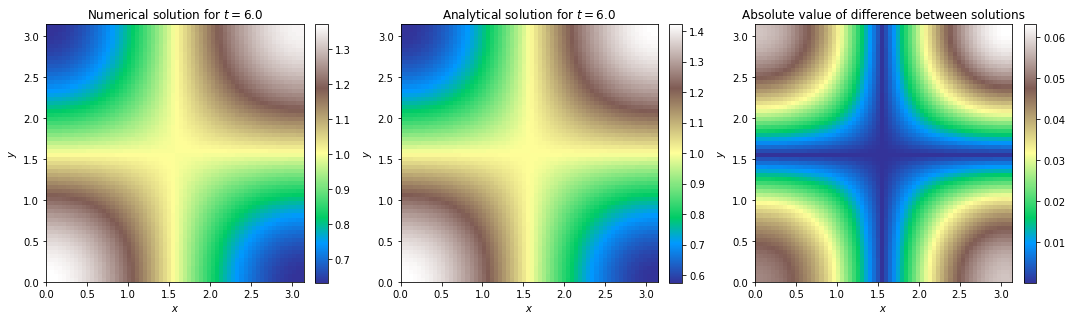

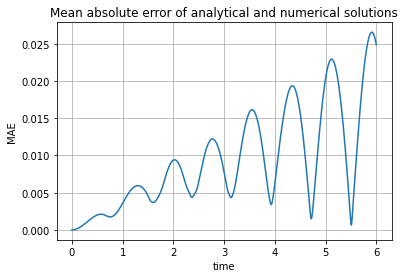

In [3]:
A, B, C, D = 0, np.pi, 0, np.pi
t_delta = 0.01
x_delta = 0.05
y_delta = 0.05
N = 600
c = np.sqrt(8)

I = lambda x, y: 1+ np.cos(x)*np.cos(y)
V = lambda x, y: np.zeros_like(x) 
u1 = lambda x, y, t: 1 + np.cos(x) * np.cos(y) * np.cos(4 * t)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_results_comparision(solution, x, y, t_delta, N, u1)

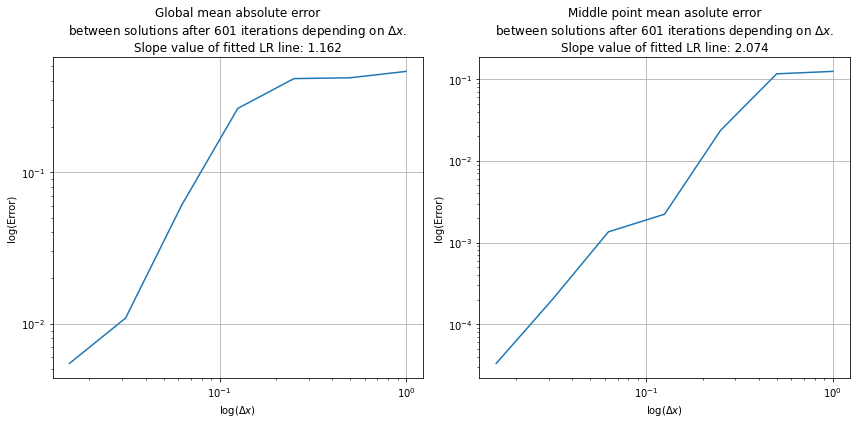

In [20]:
r = 0.8
filename = "data/errors1.csv"
if not os.path.isfile(filename):
    x_d, err_g, err_p = calculate_errors(A, B, C, D, N, c, I, V, u1, filename, r)
else:
    errors = np.loadtxt(filename, delimiter=';', skiprows=1)
    x_d = errors[:, 0]
    err_g = errors[:, 1]
    err_p = errors[:, 2]
    
plot_log_log(x_d, err_g, err_p)

## Example 3.2

$$\begin{cases}
u_{tt}       = 2(u_{xx} + u_{yy}),  &(x, y) \in \left[0,\pi \right], \; t>0 \tag{16} \\
u(x, y, 0)   = 0          \\
u_t(x, y, 0) = 2\cos{(x)}\cos{(y)},                     \\
u_x(0,y,t)=0,\; u_x(\pi,y,t)=0, \; \\
u_y(x,0,t)=0, \; u_y(x,\pi,t)=0. 
\end{cases}$$
To solve the equation, the same method as in Example 1 was applied (separation of variables method). The solution steps are presented below.

It is assumed that the solution is of the following form
$$
u(x, y, t) = X(x)Y(y)T(t). \tag{17}
$$
After substituting the solution (17) into equation (16), the following is obtained:
$$\begin{equation*}
X(x)Y(y)T''(t) = 2\left(X''(x)Y(y)T(t) + X(x)Y''(y)T(t)\right).
\end{equation*}$$
After transformation, the equation is
$$\begin{equation*}
\frac{T''(t)}{2T(t)} = \frac{X''(x)}{X(x)} + \frac{Y''(y)}{Y(y)}, \tag{18}
\end{equation*}$$
Both sides of equation (18) must be equal to the some constant (nontrivial cases are considered), so
$$\begin{equation*}
\frac{X''(x)}{X(x)} = -\lambda^2, \ \frac{Y''(y)}{Y(y)} = -\mu^2,
\end{equation*}$$
and
$$\begin{equation*}
\frac{T''(t)}{2T(t)} = -\lambda^2 - \mu^2.
\end{equation*}$$
Let $-\gamma^2$ be equal to $-\lambda^2 - \mu^2$, then $\frac{T''(t)}{2T(t)}=-\gamma^2$.
Thus, it can be seen that the solutions to these three equations are as follows
$$\begin{align*}
X(x) &= A \cos(\lambda x) + B \sin(\lambda x).\\
Y(y) & = C \cos(\mu y) + D \sin(\mu y),\\
T(t) & = E \cos(\sqrt{2} \gamma t) + F \sin(\sqrt{2} \gamma t) \tag{19}
\end{align*}$$
where A, B, C, D, E, F are constants.

From boundary conditions for $X$
$$\begin{align*}
u_x(0, y, t) = X'(0)Y(y)T(t) = 0 \implies  X'(0) = 0, \\
X'(0) = -\lambda A \sin(0) + \lambda B \cos(0) = 0, \implies B = 0.
\end{align*}$$

$$\begin{align*}
u_x(\pi, y, t) = X'(\pi)Y(y)T(t) = 0 \implies X'(\pi) = 0,\\
X'(\pi) = -\lambda A \sin(\lambda \pi) + \lambda B \cos(\lambda \pi) = 0, \implies -\lambda A \sin(\lambda \pi) = 0
\end{align*}$$
so for nontrivial solution
$$\begin{align*}
\sin(\lambda \pi) &= 0, \\ 
\lambda \pi &= n \pi, \quad n = 0, 1, 2, \ldots\\
\lambda_n &=\frac{n\pi}{\pi}=n, \quad n = 0, 1, 2,\ldots
\end{align*}$$
Similarly from Neumann's boundary conditions for $Y$ obtained 
$$ \mu_m =\frac{m\pi}{\pi}=m, \quad m = 0, 1, 2,\ldots $$
Thus, it can be seen that $$X_n(x)=A_n\cos{(nx)},$$ $$Y_m(y)=C_m\cos{(my)},$$ where $n,m=0,1,2,\dots$.

Calculated $\lambda_n$ and $\mu_m$ was substituted into (19), which gave
$$\begin{equation*}
T_{nm}(t) = E_{nm} \cos\left(\sqrt{2(n^2 + m^2)}t\right) + F_{nm} \sin\left(\sqrt{2(n^2 + m^2)}t\right).
\end{equation*}$$
So by combining the solutions for $X(x)$, $Y(y)$, $T(t)$ we get general solution of equation (11)
$$\begin{align*}
u_{nm}(x, y, t) &= X_n(x) Y_m(y) T_{nm}(t) \\&= \left(A_n \cos(nx)\right) \left(C_m \cos(my)\right)
\left(E_{nm} \cos \left(\sqrt{2(n^2 + m^2)}t\right) + F_{nm} \sin \left(\sqrt{2(n^2 + m^2)}t\right) \right)\\
&=\left(\cos(nx)\right) \left(\cos(my)\right)\left(\alpha_{nm} \cos \left(\sqrt{2(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{2(n^2 + m^2)}t\right) \right).
\end{align*}$$
where $\alpha_{nm}=A_n \cdot C_m \cdot E_{nm}$ and $\beta_{nm}=A_n \cdot C_m \cdot F_{nm}$.
This may be written in the form of
$$\begin{equation*}
u(x, y, t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)
 \left(\alpha_{nm} \cos \left(\sqrt{2(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{2(n^2 + m^2)}t\right)\right) \right].\tag{20}
\end{equation*}$$
And the derevative with respect to t is
$$\begin{equation*}
u_t(x, y, t)=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)\sqrt{2(n^2 + m^2)}\left(-\alpha_{nm} \sin \left(\sqrt{2(n^2 + m^2)}t\right) + \beta_{nm} \cos \left(\sqrt{2(n^2 + m^2)}t\right)\right)\right].
\end{equation*}$$
To find $\alpha_{nm}$ and $\beta_{nm}$ the initial conditions were used. First, to found $\lambda_nm$
$$\begin{equation*}
u(x, y, 0) = 0
\end{equation*}$$
$$\begin{align*}
u(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
0 &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
0 &= \alpha_{00} + \alpha_{01}\cos(y) + \alpha_{10} \cos(x) + \alpha_{11} \cos(x) \cos(y) + \alpha_{22} \cos(2x) \cos(2y) + \cdots.\\
\alpha_{nm}&=0 \quad \forall_{n,m}
\end{align*}$$

From the second initial condition, $\beta_{nm}$ was determined as shown below 
$$\begin{equation*}
u_t(x, y, 0) = 2\cos{(x)}\cos{(y)}
\end{equation*}$$
$$\begin{align*}
u_t(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{2(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
2\cos{(x)}\cos{(y)} &=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{2(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
2\cos{(x)}\cos{(y)} &=\sqrt{2}\beta_{01}\cos(y)+\sqrt{2}\beta_{10} \cos(x)+ 2\beta_{11} \cos(x) \cos(y) + 4\beta_{22} \cos(2x) \cos(2y) + \cdots 
\end{align*}$$
So it can be seen that 
$$\begin{equation*}
\beta_{11} = 1, \quad \forall_{\{n,m \ \text{except }n=m=1 \}} \ \beta_{nm} = 0.
\end{equation*}$$

Finally, after substitution of the calculated variables $\alpha_{nm}$ and $\beta_{nm}$  into (20), the following solution was obtained
$$\begin{equation*}
u(x, y, t) = \cos{(x)}\cos{(y)}\sin{(2t)}.
\end{equation*}$$

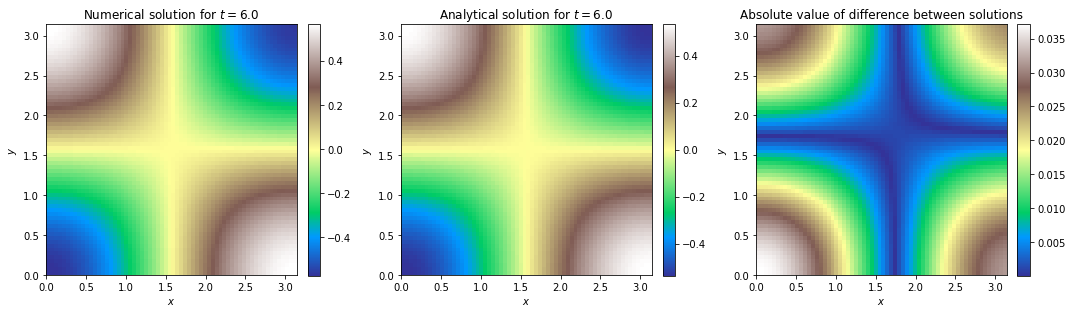

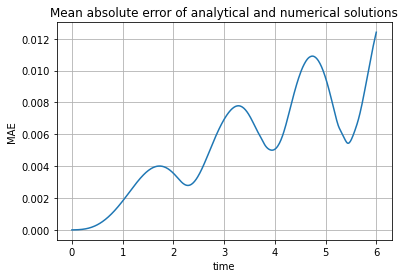

In [286]:
A, B, C, D = 0, np.pi, 0, np.pi
t_delta = 0.01
x_delta = 0.05
y_delta = 0.05
N = 600
c = np.sqrt(2)

I = lambda x, y: np.zeros_like(x)
V = lambda x, y: 2*np.cos(x)*np.cos(y) 
u2 = lambda x, y, t: np.cos(x) * np.cos(y) * np.sin(2 * t)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_results_comparision(solution, x, y, t_delta, N, u2)

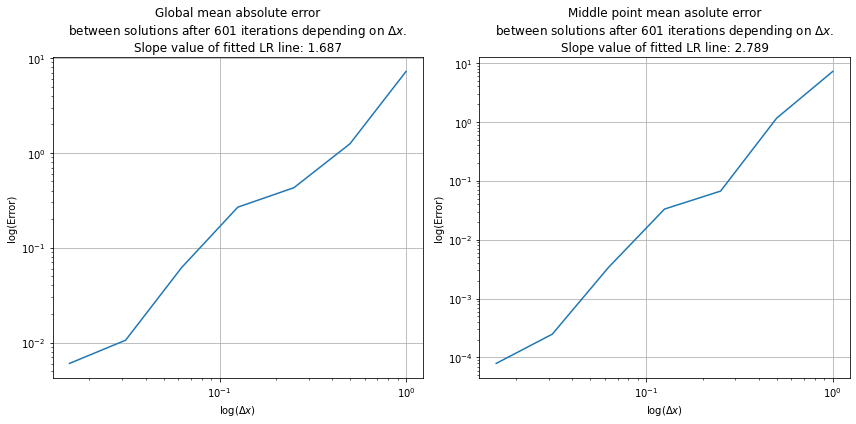

In [19]:
r = 0.8
filename = "data/errors2.csv"
if not os.path.isfile(filename):
    x_d, err_g, err_p = calculate_errors(A, B, C, D, N, c, I, V, u2, filename, r)
else:
    errors = np.loadtxt(filename, delimiter=';', skiprows=1)
    x_d = errors[:, 0]
    err_g = errors[:, 1]
    err_p = errors[:, 2]
    
plot_log_log(x_d, err_g, err_p)

## Example 3.3

$$\begin{cases}
u_{tt}       = 5(u_{xx} + u_{yy}),  &(x, y) \in \left[0,\pi \right], \; t>0 \tag{21} \\
u(x, y, 0)   = 3         \\
u_t(x, y, 0) = 5\cos{(x)}\cos{(2y)},                     \\
u_x(0,y,t)=0,\; u_x(\pi,y,t)=0, \; \\
u_y(x,0,t)=0, \; u_y(x,\pi,t)=0. 
\end{cases}$$
To solve the equation, the same method as previously was applied (separation of variables method). The solution steps are presented below.

It is assumed that the solution is of the following form
$$
u(x, y, t) = X(x)Y(y)T(t). \tag{22}
$$
After substituting the solution (22) into equation (21), the following is obtained:
$$\begin{equation*}
X(x)Y(y)T''(t) = 5\left(X''(x)Y(y)T(t) + X(x)Y''(y)T(t)\right).
\end{equation*}$$
After transformation, the equation is
$$\begin{equation*}
\frac{T''(t)}{5T(t)} = \frac{X''(x)}{X(x)} + \frac{Y''(y)}{Y(y)}, \tag{23}
\end{equation*}$$
Both sides of equation (23) must be equal to the some constant (nontrivial cases are considered), so
$$\begin{equation*}
\frac{X''(x)}{X(x)} = -\lambda^2, \ \frac{Y''(y)}{Y(y)} = -\mu^2,
\end{equation*}$$
and
$$\begin{equation*}
\frac{T''(t)}{5T(t)} = -\lambda^2 - \mu^2.
\end{equation*}$$
Let $-\gamma^2$ be equal to $-\lambda^2 - \mu^2$, then $\frac{T''(t)}{5T(t)}=-\gamma^2$.
Thus, it can be seen that the solutions to these three equations are as follows
$$\begin{align*}
X(x) &= A \cos(\lambda x) + B \sin(\lambda x).\\
Y(y) & = C \cos(\mu y) + D \sin(\mu y),\\
T(t) & = E \cos(\sqrt{5} \gamma t) + F \sin(\sqrt{5} \gamma t) \tag{24}
\end{align*}$$
where A, B, C, D, E, F are constants.

From boundary conditions for $X$
$$\begin{align*}
u_x(0, y, t) = X'(0)Y(y)T(t) = 0 \implies  X'(0) = 0, \\
X'(0) = -\lambda A \sin(0) + \lambda B \cos(0) = 0, \implies B = 0.
\end{align*}$$

$$\begin{align*}
u_x(\pi, y, t) = X'(\pi)Y(y)T(t) = 0 \implies X'(\pi) = 0,\\
X'(\pi) = -\lambda A \sin(\lambda \pi) + \lambda B \cos(\lambda \pi) = 0, \implies -\lambda A \sin(\lambda \pi) = 0
\end{align*}$$
so for nontrivial solution
$$\begin{align*}
\sin(\lambda \pi) &= 0, \\ 
\lambda \pi &= n \pi, \quad n = 0, 1, 2, \ldots\\
\lambda_n &=\frac{n\pi}{\pi}=n, \quad n = 0, 1, 2,\ldots
\end{align*}$$
Similarly from Neumann's boundary conditions for $Y$ obtained 
$$ \mu_m =\frac{m\pi}{\pi}=m, \quad m = 0, 1, 2,\ldots $$
Thus, it can be seen that $$X_n(x)=A_n\cos{(nx)},$$ $$Y_m(y)=C_m\cos{(my)},$$ where $n,m=0,1,2,\dots$.

Calculated $\lambda_n$ and $\mu_m$ was substituted into (24), which gave
$$\begin{equation*}
T_{nm}(t) = E_{nm} \cos\left(\sqrt{5(n^2 + m^2)}t\right) + F_{nm} \sin\left(\sqrt{5(n^2 + m^2)}t\right).
\end{equation*}$$
So by combining the solutions for $X(x)$, $Y(y)$, $T(t)$ we get general solution of equation (21)
$$\begin{align*}
u_{nm}(x, y, t) &= X_n(x) Y_m(y) T_{nm}(t) \\&= \left(A_n \cos(nx)\right) \left(C_m \cos(my)\right)
\left(E_{nm} \cos \left(\sqrt{5(n^2 + m^2)}t\right) + F_{nm} \sin \left(\sqrt{5(n^2 + m^2)}t\right) \right)\\
&=\left(\cos(nx)\right) \left(\cos(my)\right)\left(\alpha_{nm} \cos \left(\sqrt{5(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{5(n^2 + m^2)}t\right) \right).
\end{align*}$$
where $\alpha_{nm}=A_n \cdot C_m \cdot E_{nm}$ and $\beta_{nm}=A_n \cdot C_m \cdot F_{nm}$.
This may be written in the form of
$$\begin{equation*}
u(x, y, t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)
 \left(\alpha_{nm} \cos \left(\sqrt{5(n^2 + m^2)}t\right) + \beta_{nm} \sin \left(\sqrt{5(n^2 + m^2)}t\right)\right) \right].\tag{25}
\end{equation*}$$
And the derevative with respect to t is
$$\begin{equation*}
u_t(x, y, t)=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[ \left(cos(nx)\right) \left(\cos(my)\right)\sqrt{5(n^2 + m^2)}\left(-\alpha_{nm} \sin \left(\sqrt{5(n^2 + m^2)}t\right) + \beta_{nm} \cos \left(\sqrt{5(n^2 + m^2)}t\right)\right)\right].
\end{equation*}$$
To find $\alpha_{nm}$ and $\beta_{nm}$ the initial conditions were used. First, to found $\lambda_nm$
$$\begin{equation*}
u(x, y, 0) = 3
\end{equation*}$$
$$\begin{align*}
u(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
3 &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\alpha_{nm} \cos(nx) \cos(my)\right]\\
3 &= \alpha_{00} + \alpha_{01}\cos(y)+\alpha_{10} \cos(x) +\alpha_{11} \cos(x) \cos(y) + \alpha_{22} \cos(2x) \cos(2y) + \cdots.\\
\alpha_{00}&=3, \quad \forall_{n,m \ \text{except } n=m=0} \  \alpha_{nm}=0
\end{align*}$$

From the second initial condition, $\beta_{nm}$ was determined as shown below 
$$\begin{equation*}
u_t(x, y, 0) = 5\cos{(x)}\cos{(2y)}
\end{equation*}$$
$$\begin{align*}
u_t(x, y, 0) &= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{5(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
5\cos{(x)}\cos{(2y)} &=\sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left[\left(\beta_{nm} \sqrt{5(n^2 + m^2)}\right) \cos(nx) \cos(my)\right] \\
5\cos{(x)}\cos{(2y)} &= \sqrt{5}\beta_{01}\cos(y) + \sqrt{5}\beta_{10} \cos(x) + \sqrt{10}\beta_{11} \cos(x) \cos(y) + 5\beta_{12} \cos(x) \cos(2y) + 5\beta_{21} \cos(2x) \cos(y) + \cdots 
\end{align*}$$
So it can be seen that 
$$\begin{equation*}
\beta_{12} = 1, \quad \forall_{\{n,m \ \text{except } n=1  \ \wedge	\ m=2 \} } \ \beta_{nm} = 0.
\end{equation*}$$

Finally, after substitution of the calculated variables $\alpha_{nm}$ and $\beta_{nm}$  into (25), the following solution was obtained
$$\begin{equation*}
u(x, y, t) = 3+\cos{(x)}\cos{(2y)}\sin{(5t)}.
\end{equation*}$$

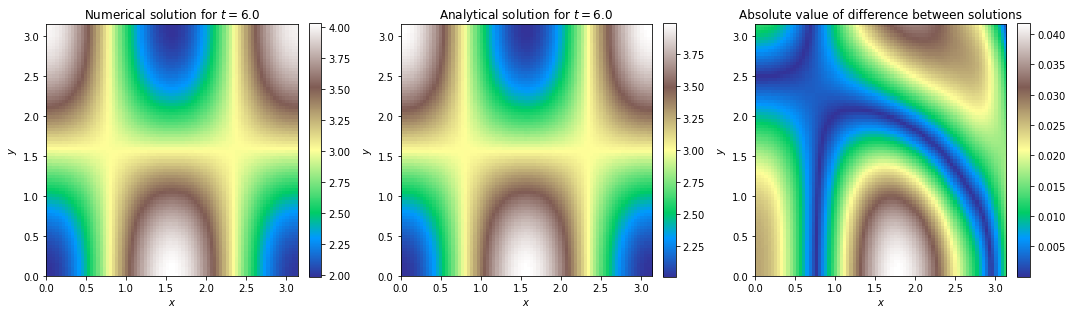

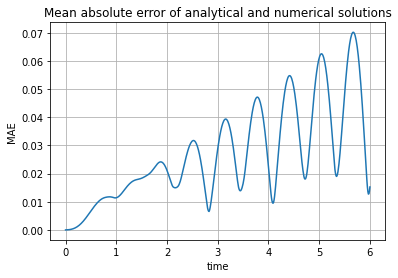

In [288]:
A, B, C, D = 0, np.pi, 0, np.pi
t_delta = 0.01
x_delta = 0.04
y_delta = 0.04
N = 600
c = np.sqrt(5)

I = lambda x, y: np.zeros_like(x)+3
V = lambda x, y: 5*np.cos(x)*np.cos(2*y) 
u3 = lambda x, y, t: 3 + np.cos(x) * np.cos(2*y) * np.sin(5 * t)

solution, x, y, t = simulate_wave(A, B, C, D, t_delta, x_delta, y_delta, N, c, I, V)
plot_results_comparision(solution, x, y, t_delta, N, u3)

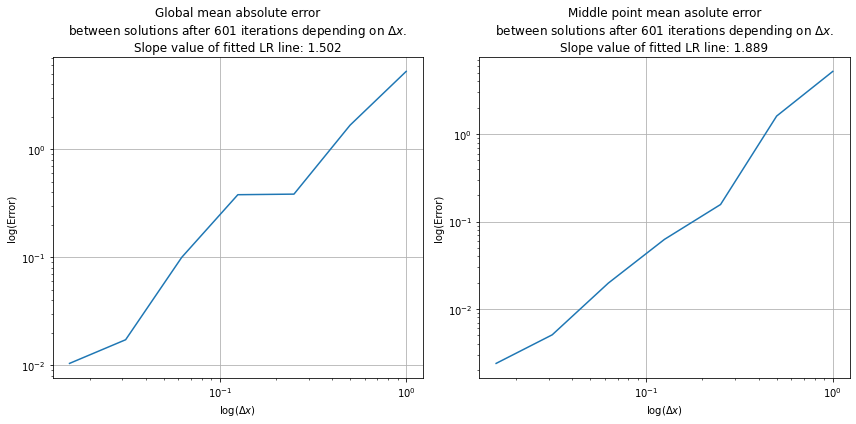

In [18]:
r = 0.8
filename = "data/errors3.csv"
if not os.path.isfile(filename):
    x_d, err_g, err_p = calculate_errors(A, B, C, D, N, c, I, V, u3, filename, r)
else:
    errors = np.loadtxt(filename, delimiter=';', skiprows=1)
    x_d = errors[:, 0]
    err_g = errors[:, 1]
    err_p = errors[:, 2]
    
plot_log_log(x_d, err_g, err_p)

## Conslusions
The relatively small differences in errors lead us to believe that the method has been implemented correctly. The highest average error was observed in Example 3 with a value of approximately $0.07$, the lowest in Example 2 with a value of approximately $0.012$. The slope values obtained oscillate around $2$, particularly for the results for the midpoint. In the case of the global error, this value is lower and reaches values between $1.162$ and $1.502$. We can assume that our method is indeed convergent and is of the order of $2$.

# Summary
------------------------

In this project, we explored the finite difference method for solving the wave equation, particularly focusing on the stability and convergence of the numerical solution. We began by deriving the finite difference scheme for the wave equation, ensuring that the scheme is consistent with the Neumann boundary conditions. We then implemented the numerical solution using Python, setting up the discretization parameters and initial conditions. To validate our numerical approach, we compared the numerical solution to the analytical solution obtained via the method of separation of variables.

Next, we conducted a detailed stability analysis using the Von Neumann method. This analysis demonstrated that the finite difference method is conditionally stable, and we derived the stability condition that relates the time step $\Delta t$ to the spatial grid spacings $\Delta x$ and $\Delta y$. This condition ensures that the numerical solution remains bounded and does not exhibit unphysical growth over time.

To evaluate the convergence of our numerical method, we computed the absolute error between the numerical and analytical solutions for various grid spacings. By plotting these errors on a log-log scale, we were able to empirically determine the order of accuracy of our method. The slope of the log-log plot, obtained through linear regression, provided a measure of the method's convergence rate $2$.

Additionally, we investigated the behavior of the numerical solution for different initial conditions, simulating scenarios such as fault line slips and seismic wave propagation. Also we graphicaly compared Neumann and Dirichlet boundary conditions. These simulations not only demonstrated the flexibility and applicability of the finite difference method but also provided insights into the physical phenomena modeled by the wave equation.

Overall, this project has provided a comprehensive analysis of the finite difference method for the wave equation, covering aspects of implementation, stability, convergence, and practical application. The results confirm that the method is both robust and accurate, provided that the stability condition is satisfied. 

# References

[1] Łukasz Płociniczak, Numerical methods for differential equations - Lecture Notes (2020)